In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv(r'../../results/computed-fuel-rates-oct2021-sep2022.csv', delimiter=',', skiprows=0, low_memory=False)

In [3]:
df.head()

,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,ServiceDateTime,DateKey,CalendarDate,Year,Month,...,Powertrain,VehicleModel,Vehicle_mass,time_delta_in_seconds,dist,Speed,Acceleration,elevation,grade,Energy
0,0,0,1365147,1365147,1365147,2021-10-01 06:43:49,8578,2021-10-01 00:00:00.000,2021,10,...,conventional,Gillig 30,25700,0,0.000000,0.000000,0.000000,45.0,0.000000,0.000000
1,1,1,1365148,1365148,1365148,2021-10-01 06:51:53,8578,2021-10-01 00:00:00.000,2021,10,...,conventional,Gillig 30,25700,484,0.594143,7.112063,0.002536,66.0,0.021959,0.325058
2,2,2,1365830,1365830,1365830,2021-10-01 06:51:53,8578,2021-10-01 00:00:00.000,2021,10,...,conventional,Gillig 30,25700,0,0.000000,0.000000,0.000000,66.0,0.000000,0.000000
3,3,3,1365831,1365831,1365831,2021-10-01 06:52:53,8578,2021-10-01 00:00:00.000,2021,10,...,conventional,Gillig 30,25700,60,0.313297,30.252048,0.087027,51.0,-0.029751,0.027469
4,4,4,1365832,1365832,1365832,2021-10-01 06:54:38,8578,2021-10-01 00:00:00.000,2021,10,...,conventional,Gillig 30,25700,105,0.421870,23.277653,-0.011465,51.0,0.000000,0.061794


In [4]:
df.columns

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1',
       'Unnamed: 0', 'ServiceDateTime', 'DateKey', 'CalendarDate', 'Year',
       'Month', 'OpKey', 'Operator', 'RtKey', 'RtKey2', 'Route', 'RouteName',
       'TripKey', 'Trip', 'StopKey', 'Stop', 'StopName', 'Vehicle',
       'VehicleType', 'SeatedCap', 'TotalCap', 'Lat', 'Lon', 'Boards',
       'Alights', 'Onboard', 'Bike', 'Daytype', 'Hour', 'Minute', 'Second',
       'Date', 'Powertrain', 'VehicleModel', 'Vehicle_mass',
       'time_delta_in_seconds', 'dist', 'Speed', 'Acceleration', 'elevation',
       'grade', 'Energy'],
      dtype='object')

In [5]:
df_selected = df[['ServiceDateTime','Powertrain', 'Vehicle','VehicleModel','time_delta_in_seconds','dist','Energy','Onboard','Date']].copy()

In [6]:
df_selected['ServiceDateTime']=pd.to_datetime(df_selected['ServiceDateTime'])

In [7]:
# Hourly energy consumption box plot
df_selected['Hour']=df_selected.ServiceDateTime.dt.hour

In [8]:
df_selected_hourly_plot = df_selected.groupby(['Date','Hour']).agg({'Energy': ['sum'],'Onboard':['sum'], 'VehicleModel':['max'], 'Powertrain':['max'], 'dist':['sum']}).reset_index()
df_selected_hourly_plot.columns = df_selected_hourly_plot.columns.droplevel(1)
df_selected_hourly_plot

,Date,Hour,Energy,Onboard,VehicleModel,Powertrain,dist
0,2021-10-01,0,21.411773,2067,NEW FLYER XDE60 (ARTIC),hybrid,86.302416
1,2021-10-01,1,17.280073,1266,NEW FLYER XDE60 (ARTIC),hybrid,77.429706
2,2021-10-01,2,2.837210,129,NEW FLYER XDE60 (ARTIC),hybrid,17.580318
3,2021-10-01,4,0.133223,0,NEW FLYER XD40,conventional,0.000000
4,2021-10-01,5,37.270953,2499,PROTERRA CATALYST BE-40,hybrid,194.556648
...,...,...,...,...,...,...,...
7443,2022-09-30,19,218.163574,20069,PROTERRA CATALYST BE-40,hybrid,572.504536
7444,2022-09-30,20,126.482709,14683,PROTERRA CATALYST BE-40,hybrid,397.967675
7445,2022-09-30,21,79.725217,12468,NEW FLYER XE35,hybrid,303.570093
7446,2022-09-30,22,46.316388,11162,NEW FLYER XDE60 (ARTIC),hybrid,187.318242


In [9]:
df_selected_hourly_plot['fuel_economy']=df_selected_hourly_plot['dist']/df_selected_hourly_plot['Energy']
df_selected_hourly_plot['energy_intensity']=df_selected_hourly_plot['Energy']/df_selected_hourly_plot['Onboard']

# Drop rows where 'fuel_economy' is NaN or inf
df_selected_hourly_plot = df_selected_hourly_plot[~df_selected_hourly_plot['fuel_economy'].isna() & (df_selected_hourly_plot['fuel_economy'] != np.inf)]
df_selected_hourly_plot = df_selected_hourly_plot[~df_selected_hourly_plot['energy_intensity'].isna() & (df_selected_hourly_plot['energy_intensity'] != np.inf)]

In [10]:
df_selected_hourly_plot_CDB=df_selected_hourly_plot.loc[df_selected_hourly_plot['Powertrain']=='conventional']

In [11]:
df_selected_hourly_plot_HEB=df_selected_hourly_plot.loc[df_selected_hourly_plot['Powertrain']=='hybrid']

In [12]:
df_selected_hourly_plot_BEB=df_selected_hourly_plot.loc[df_selected_hourly_plot['Powertrain']=='electric']

In [13]:
df_selected_hourly_plot_BEB

,Date,Hour,Energy,Onboard,VehicleModel,Powertrain,dist,fuel_economy,energy_intensity
237,2021-10-12,5,37.291972,2050,PROTERRA CATALYST BE-40,electric,192.281625,5.156113,0.018191
456,2021-10-22,5,41.201354,2518,PROTERRA CATALYST BE-40,electric,206.504185,5.012073,0.016363
457,2021-10-22,6,184.995846,15452,PROTERRA CATALYST BE-40,electric,632.306272,3.417948,0.011972
670,2021-11-01,5,41.375677,3069,PROTERRA CATALYST BE-40,electric,208.745535,5.045127,0.013482
692,2021-11-02,6,139.926126,7488,PROTERRA CATALYST BE-40,electric,500.631055,3.577824,0.018687
...,...,...,...,...,...,...,...,...,...
6790,2022-08-30,20,99.445424,10633,NEW FLYER XE40,electric,331.250872,3.330982,0.009353
6853,2022-09-02,21,92.259603,13290,NEW FLYER XE35,electric,284.287062,3.081382,0.006942
6854,2022-09-02,22,47.150454,7351,NEW FLYER XE35,electric,127.444354,2.702930,0.006414
7405,2022-09-29,5,41.852348,2727,NEW FLYER XE40,electric,195.284172,4.666027,0.015347


In [14]:
df_selected_hourly_plot_CDB_filtered = df_selected_hourly_plot_CDB.loc[df_selected_hourly_plot_CDB['fuel_economy'] < 10]
df_selected_hourly_plot_CDB_filtered = df_selected_hourly_plot_CDB_filtered.loc[df_selected_hourly_plot_CDB_filtered['energy_intensity'] < 0.5]


fig, axs = plt.subplots(nrows=2, figsize=(15, 30), dpi=400, sharex=True)

# Reduce vertical distance between subplots to 0.05 inches
fig.subplots_adjust(hspace=0.04)


sns.boxplot(x='Hour', y='fuel_economy', data=df_selected_hourly_plot_CDB_filtered, ax=axs[0],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[0].set_xlabel('')
axs[0].set_ylabel('Fuel economy \n (MPG)', fontsize=40)
#axs[1].set_ylabel('')
axs[0].tick_params(labelsize=28)
axs[0].grid(color='lightgrey', linewidth=0.4)
#axs[1].set_ylim(5e-5, 5e+20)
#axs[1].set_xlim(-4, 20)

sns.boxplot(x='Hour', y='energy_intensity', data=df_selected_hourly_plot_CDB_filtered, ax=axs[1],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[1].set_xlabel('')
#axs[1].set_ylabel('')
axs[1].set_ylabel('Energy intensity \n (gal per passenger)', fontsize=38)
axs[1].tick_params(labelsize=22)
axs[1].grid(color='lightgrey', linewidth=0.4)
axs[1].set_xlabel('Hour', fontsize=38)
#axs[2].set_ylim(0, 0.1)
#axs[2].set_xlim(-4, 20)

fig.savefig(r'../../figures/hourly-results-facet-plot-CDB-oct2021-sep2022.png', dpi=400, bbox_inches='tight')
plt.show()

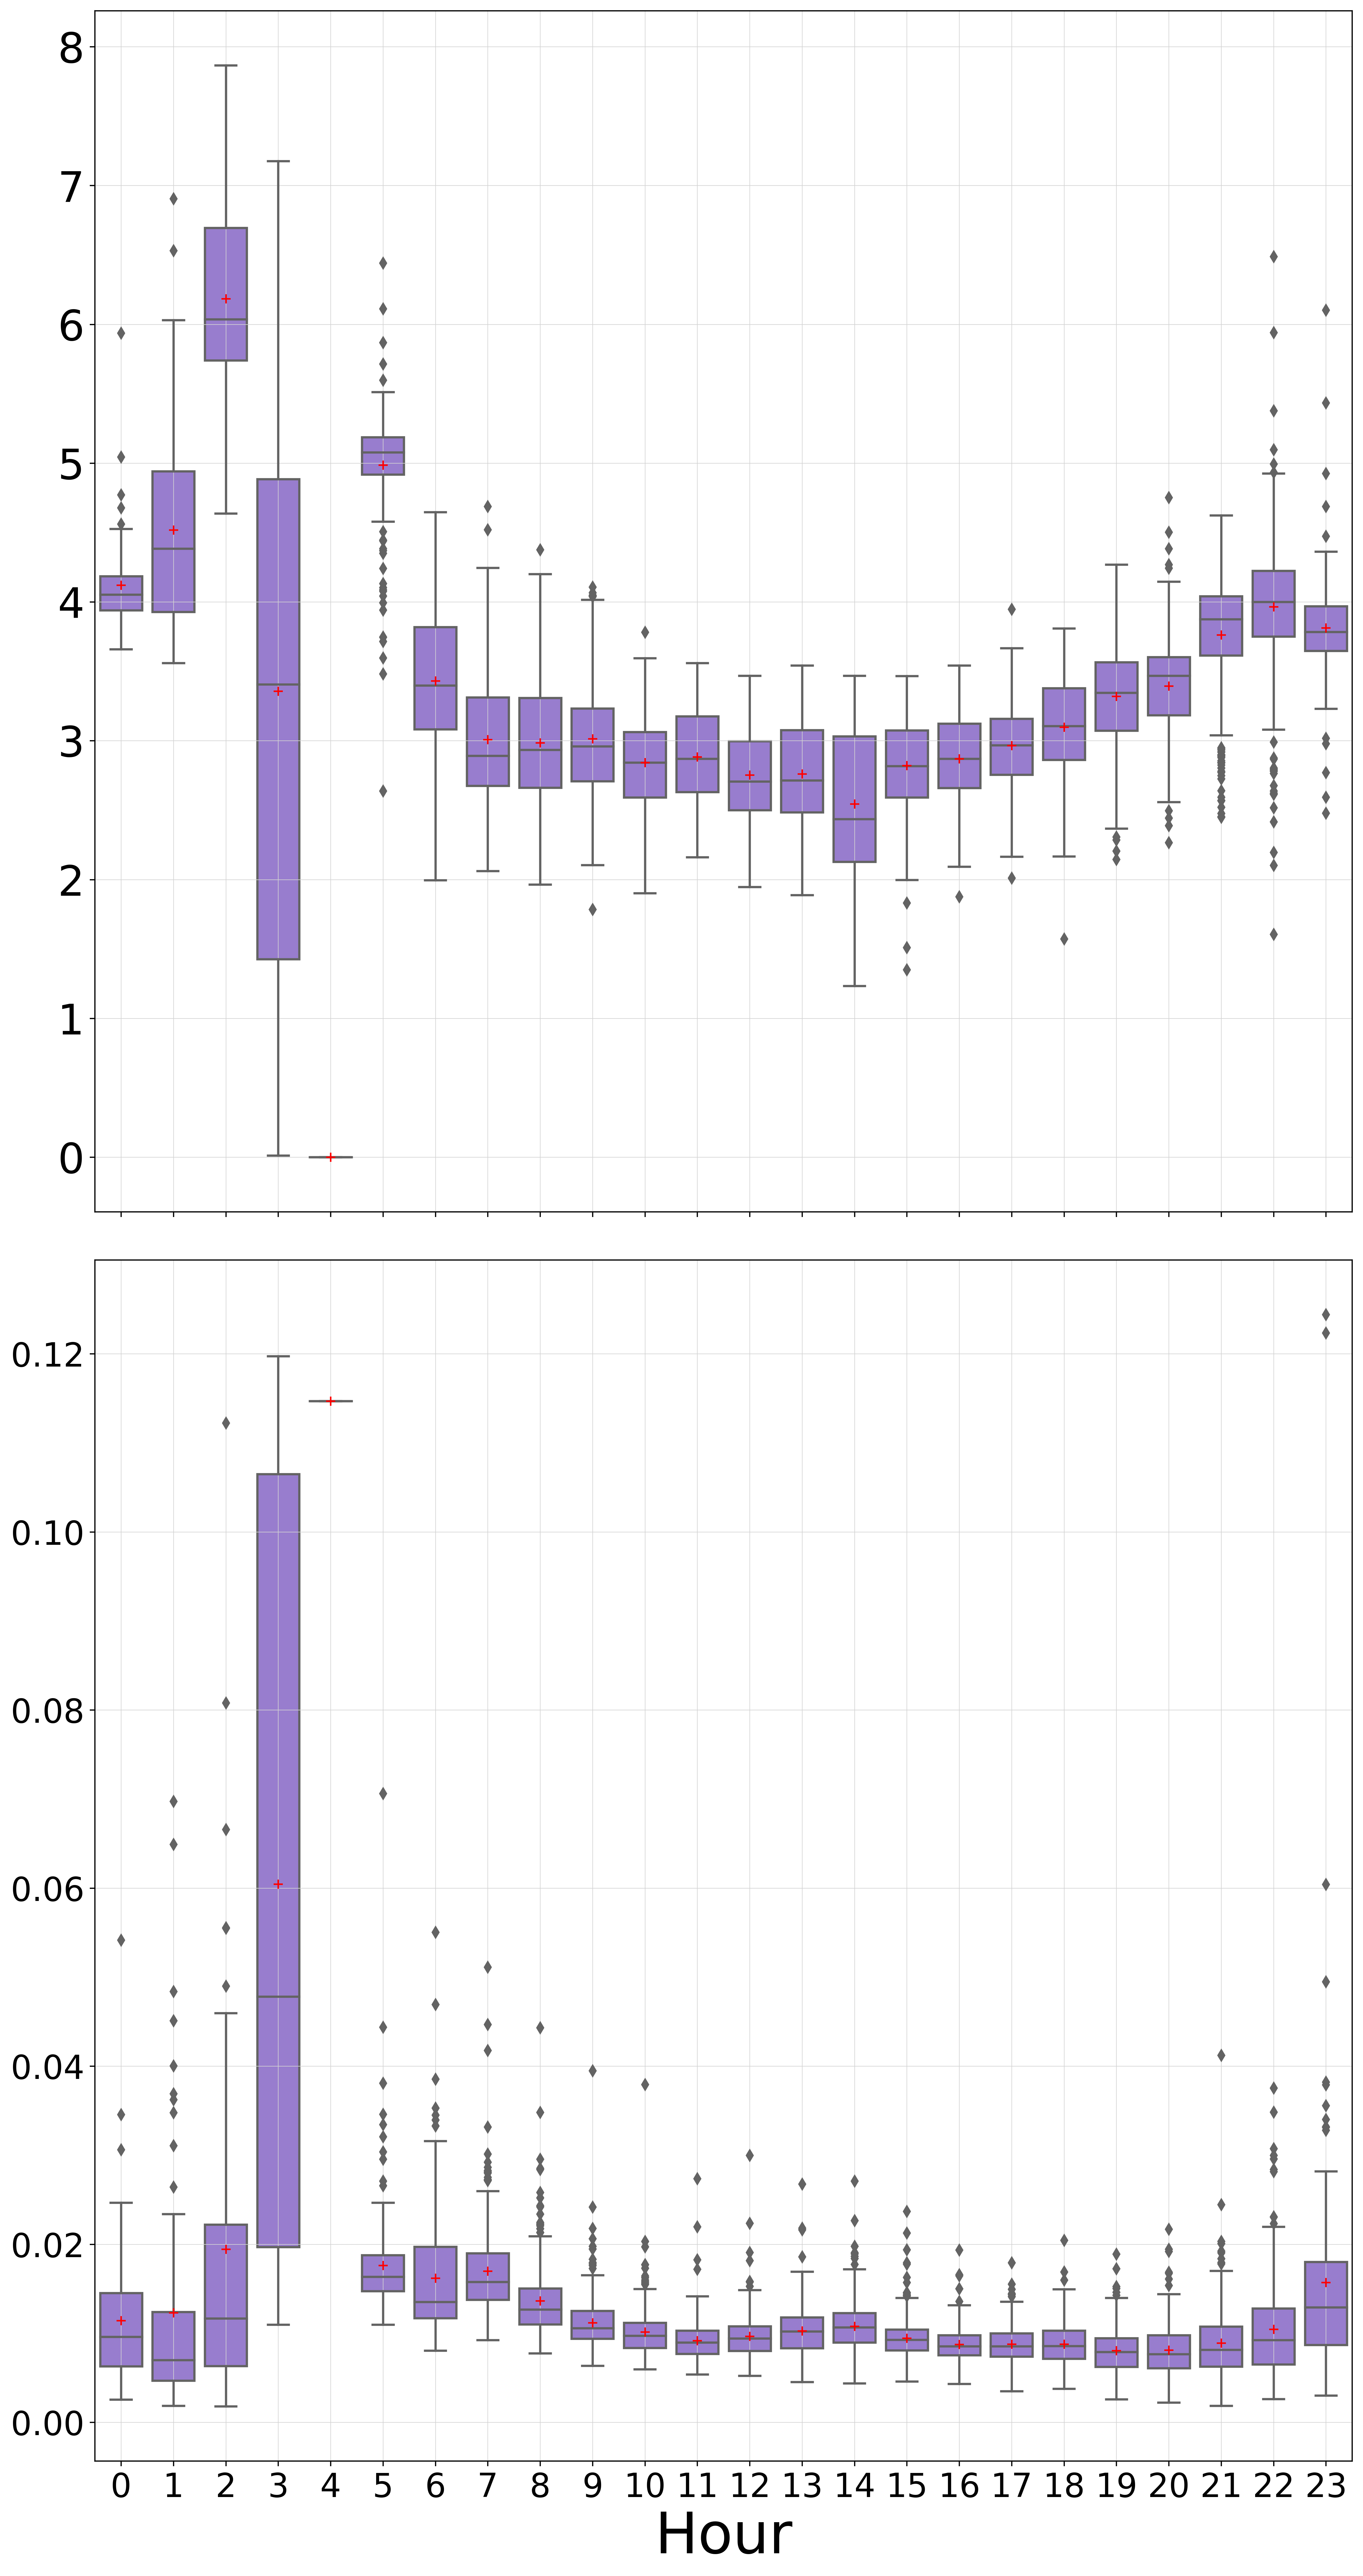

In [15]:
#df_selected_hourly_plot_HEB_filtered = df_selected_hourly_plot_HEB.loc[df_selected_hourly_plot_HEB['fuel_economy'] < 10]
df_selected_hourly_plot_HEB_filtered = df_selected_hourly_plot_HEB.loc[df_selected_hourly_plot_HEB['energy_intensity'] < 0.2]


fig, axs = plt.subplots(nrows=2, figsize=(15, 30), dpi=400, sharex=True)

# Reduce vertical distance between subplots to 0.05 inches
fig.subplots_adjust(hspace=0.04)


sns.boxplot(x='Hour', y='fuel_economy', data=df_selected_hourly_plot_HEB_filtered, ax=axs[0],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[0].set_xlabel('')
#axs[0].set_ylabel('Fuel economy \n (MPG)', fontsize=40)
axs[0].set_ylabel('')
axs[0].tick_params(labelsize=28)
axs[0].grid(color='lightgrey', linewidth=0.4)
#axs[1].set_ylim(5e-5, 5e+20)
#axs[1].set_xlim(-4, 20)

sns.boxplot(x='Hour', y='energy_intensity', data=df_selected_hourly_plot_HEB_filtered, ax=axs[1],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[1].set_xlabel('')
axs[1].set_ylabel('')
#axs[1].set_ylabel('Energy intensity \n (gal per passenger)', fontsize=38)
axs[1].tick_params(labelsize=22)
axs[1].grid(color='lightgrey', linewidth=0.4)
axs[1].set_xlabel('Hour', fontsize=38)
#axs[2].set_ylim(0, 0.1)
#axs[2].set_xlim(-4, 20)

fig.savefig(r'../../figures/hourly-results-facet-plot-HEB-oct2021-sep2022.png', dpi=400, bbox_inches='tight')
plt.show()

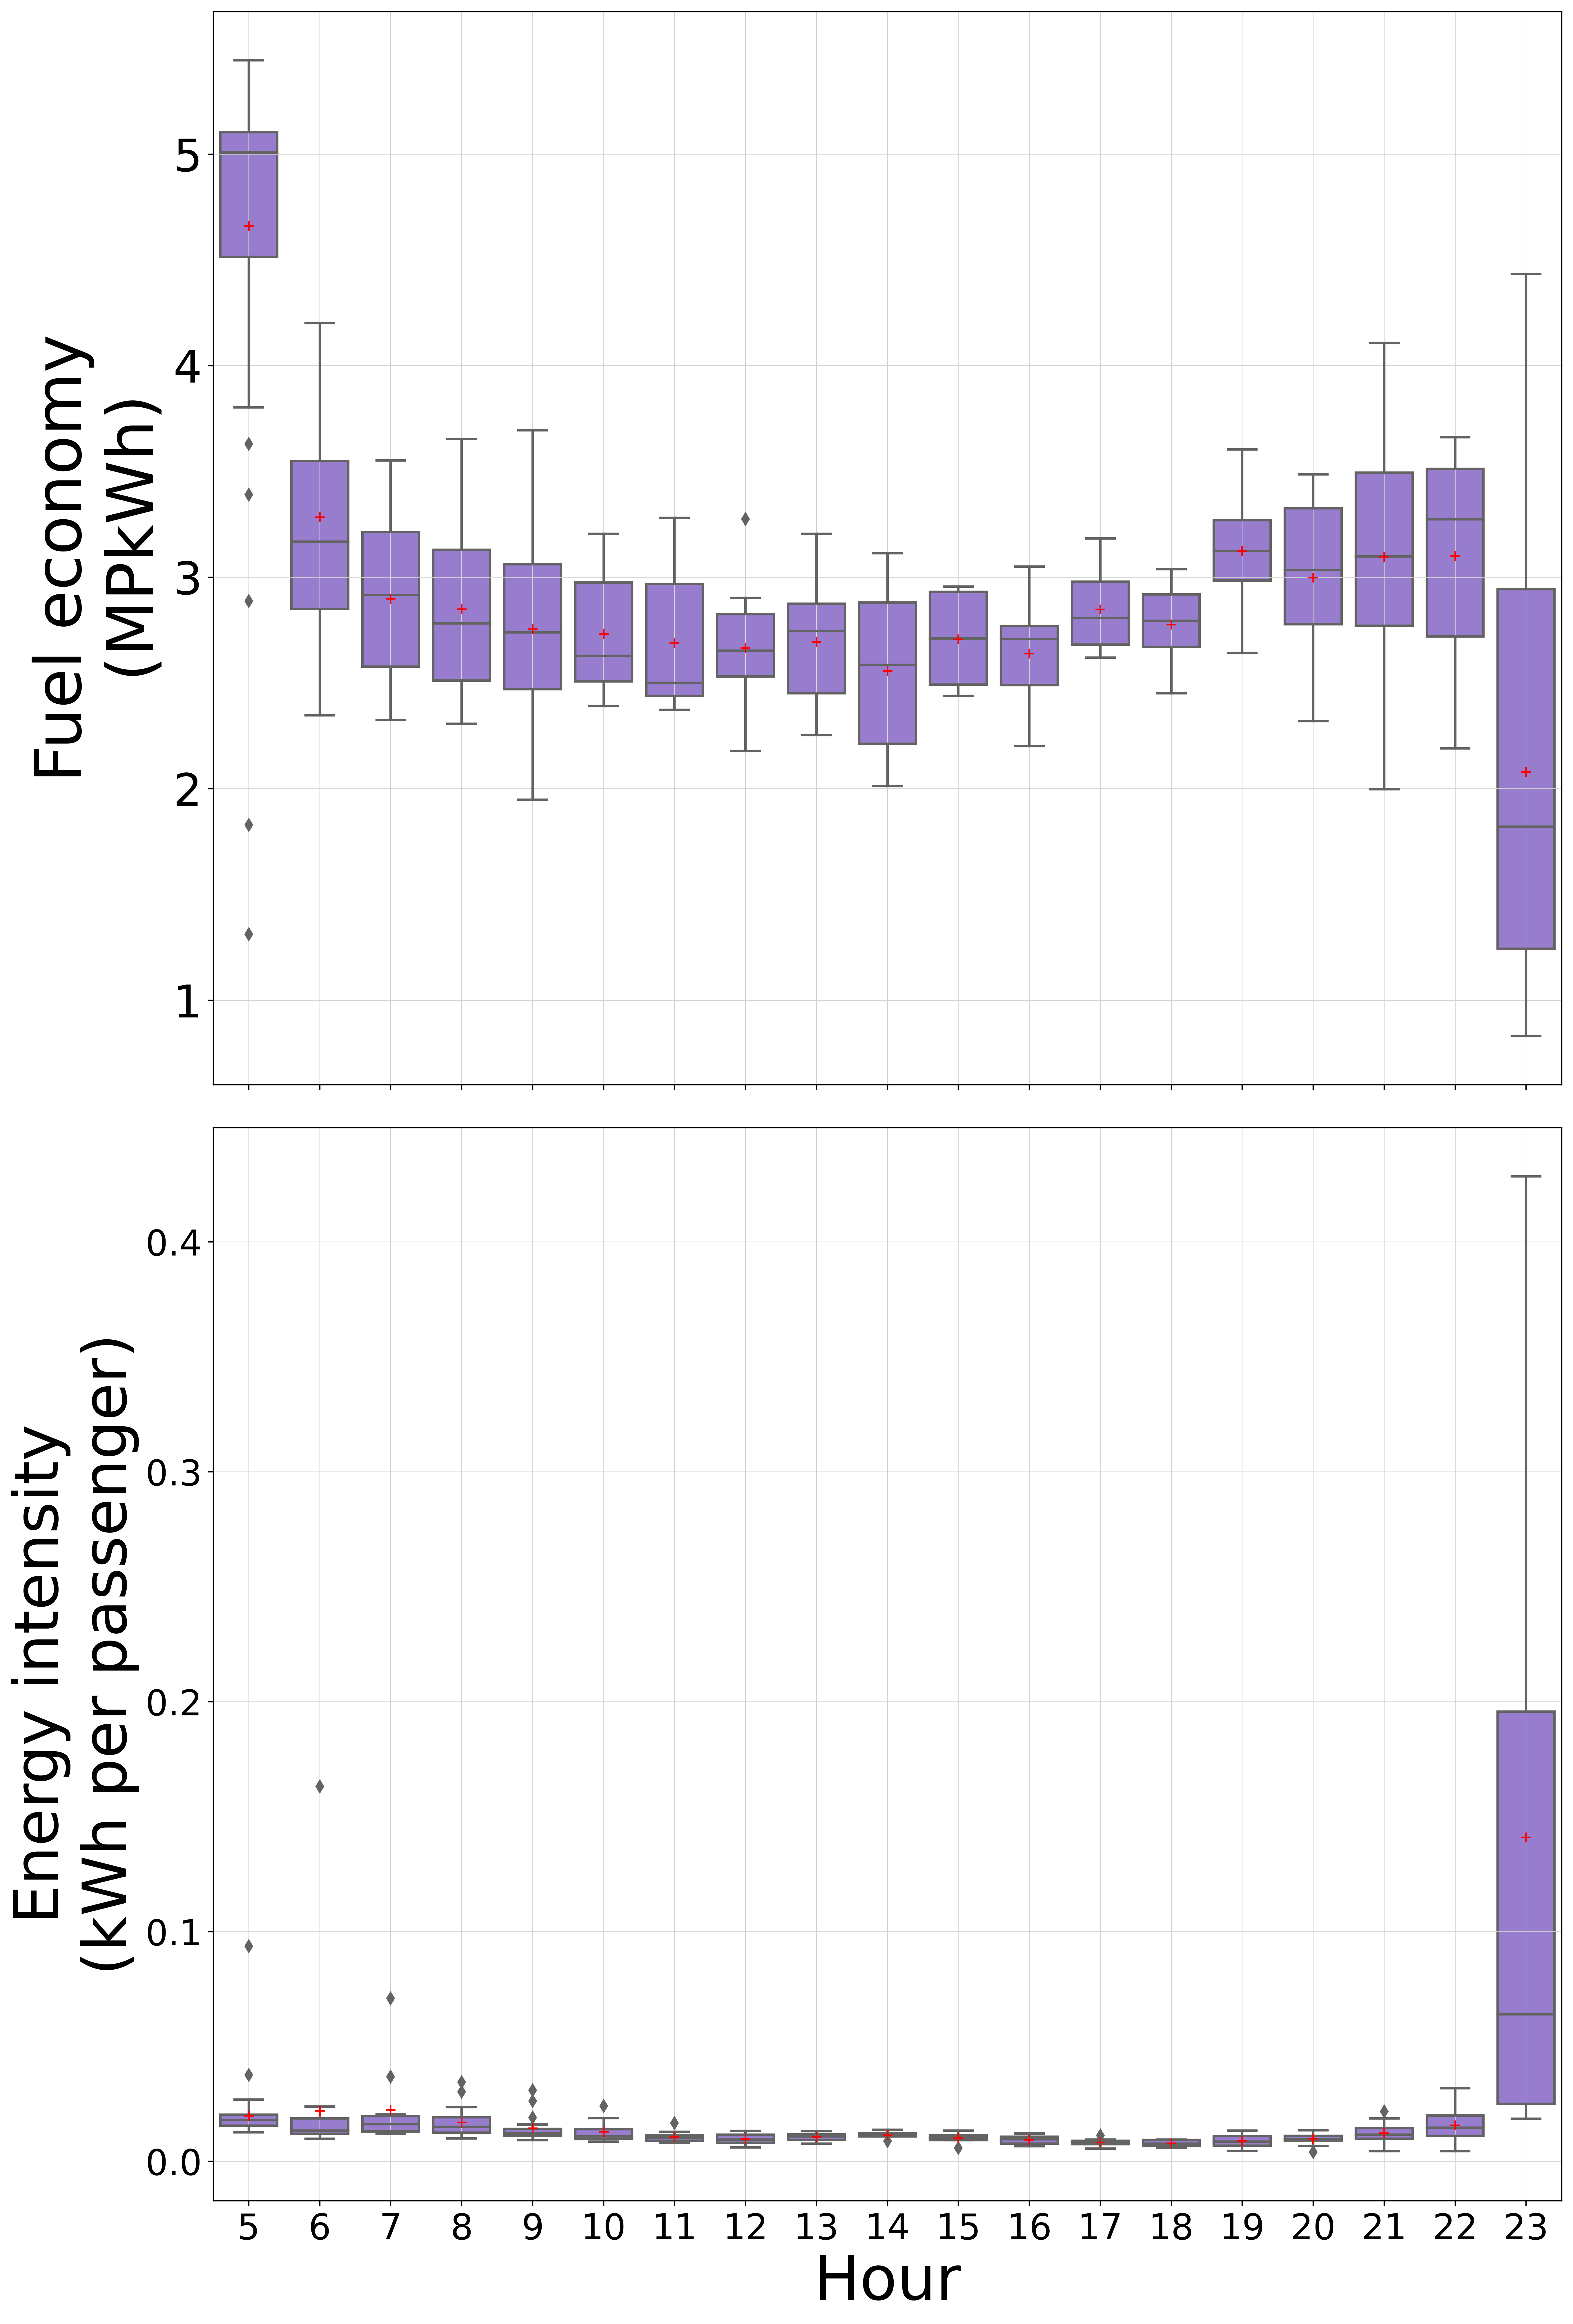

In [16]:
#df_selected_hourly_plot_BEB_filtered = df_selected_hourly_plot_BEB.loc[df_selected_hourly_plot_BEB['fuel_economy'] < 10]
#df_selected_hourly_plot_BEB_filtered = df_selected_hourly_plot_BEB.loc[df_selected_hourly_plot_BEB['energy_intensity'] < 0.1]


fig, axs = plt.subplots(nrows=2, figsize=(15, 25), dpi=400, sharex=True)

# Reduce vertical distance between subplots to 0.05 inches
fig.subplots_adjust(hspace=0.04)


sns.boxplot(x='Hour', y='fuel_economy', data=df_selected_hourly_plot_BEB, ax=axs[0],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[0].set_xlabel('')
axs[0].set_ylabel('Fuel economy \n (MPkWh)', fontsize=40)
#axs[1].set_ylabel('')
axs[0].tick_params(labelsize=28)
axs[0].grid(color='lightgrey', linewidth=0.4)
#axs[1].set_ylim(5e-5, 5e+20)
#axs[1].set_xlim(-4, 20)

sns.boxplot(x='Hour', y='energy_intensity', data=df_selected_hourly_plot_BEB, ax=axs[1],showmeans=True, meanprops={"marker": "+","markeredgecolor": "red"},  color="mediumpurple")
axs[1].set_xlabel('')
#axs[1].set_ylabel('')
axs[1].set_ylabel('Energy intensity \n (kWh per passenger)', fontsize=38)
axs[1].tick_params(labelsize=22)
axs[1].grid(color='lightgrey', linewidth=0.4)
axs[1].set_xlabel('Hour', fontsize=38)
#axs[2].set_ylim(0, 0.1)
#axs[2].set_xlim(-4, 20)

fig.savefig(r'../../figures/hourly-results-facet-plot-BEB-oct2021-sep2022.png', dpi=400, bbox_inches='tight')
plt.show()

In [17]:
df_selected_hourly_plot_BEB_filtered['fuel_economy'].mean()

NameError: name 'df_selected_hourly_plot_BEB_filtered' is not defined

In [ ]:
df_selected_hourly_plot_CDB_filtered['energy_intensity'].mean()